## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

# 0: Limpieza de datos:

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
# Elimino la columna "deck", tiene demasiados nulos para utilizarse
df_titanic.drop("deck", axis= 1, inplace= True)

In [5]:
# Elimino embarked, misma info que en "embark_town"
df_titanic.drop("embarked", axis= 1, inplace= True)

In [6]:
# Relleno los valores faltantes de edad y ciudad de embarque con su media y moda
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].mean())
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode())
df_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   class        891 non-null    object 
 8   who          891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
 11  alive        891 non-null    object 
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 78.4+ KB


# 1- El titanic fue un accidente con una tasa de mortalidad alta.  

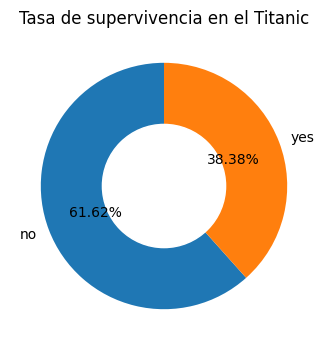

In [10]:
data = df_titanic["alive"].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.pie(data.values, labels=data.index, autopct='%.2f%%', startangle=90)

my_circle = plt.Circle((0, 0), 0.5, color="white")   

ax.add_artist(my_circle)
plt.title("Tasa de supervivencia en el Titanic")
plt.show()

# 2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  


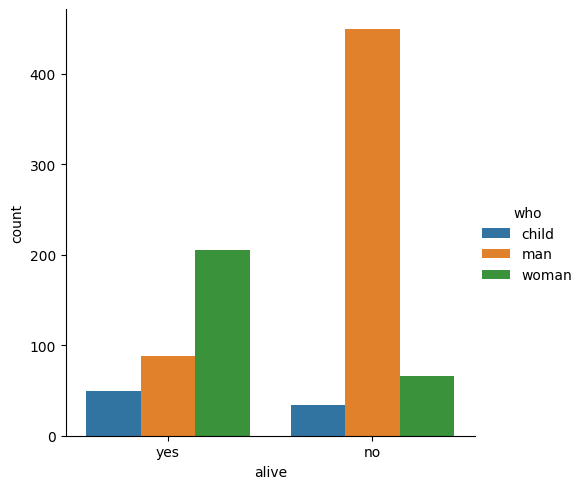

In [12]:
# Calcular la supervivencia entre hombres y mujeres

sns.catplot(x = "alive",
            hue = "who", #---> un color diferente para cada class
            kind = "count",
            edgecolor = ".6",
            orient = "V",
            data = df_titanic.sort_values("who"));


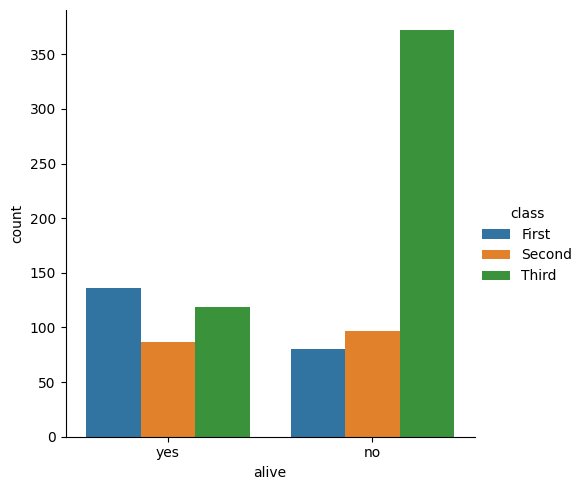

In [15]:
# Calcular la supervivencia dependiendo de la clase:
sns.catplot(x = "alive",
            hue = "class", #---> un color diferente para cada class
            kind = "count",
            edgecolor = ".6",
            orient = "V",
            data = df_titanic.sort_values("class"));


# 3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...

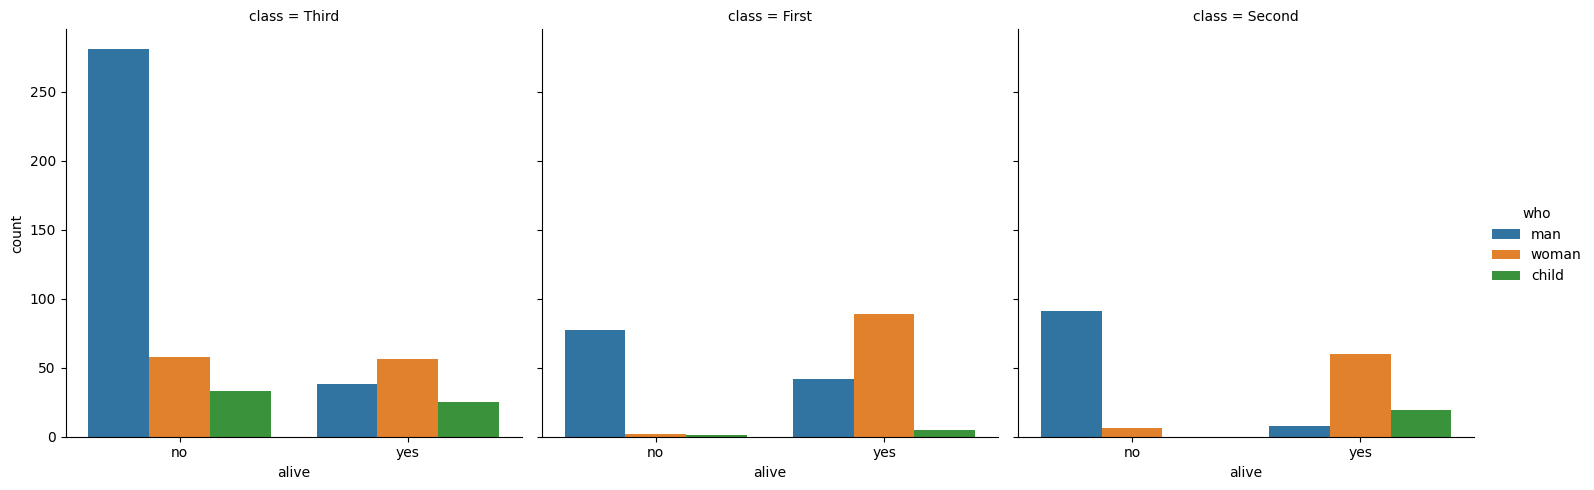

In [13]:
# Supervivencia dependiendo de la clase y el género:

sns.catplot(x="alive",
            col = "class",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "who",
            legend= True,
            data=df_titanic);

# 4- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

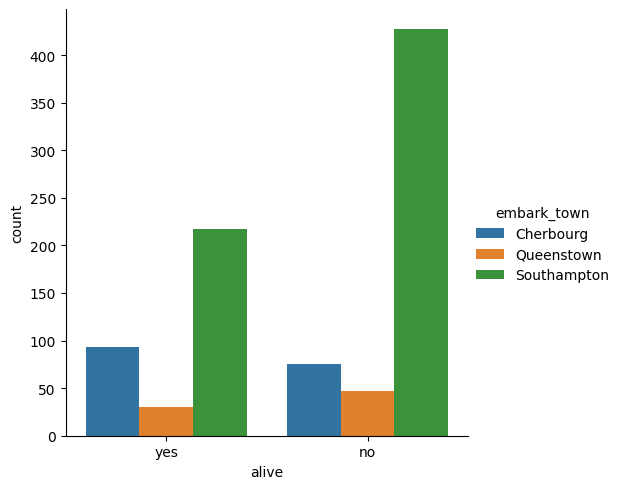

In [17]:
sns.catplot(x = "alive",
            hue = "embark_town", #---> un color diferente para cada class
            kind = "count",
            edgecolor = ".6",
            orient = "V",
            data = df_titanic.sort_values("embark_town"));
